In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'Fig3C_data.xlsx'
xl = pd.ExcelFile(filename)
print(xl.sheet_names)

['Fig3C_raw', 'Fig3C_gfp']


In [3]:
# import GFP (background subtracted)
gfp = xl.parse('Fig3C_gfp', index_col = 0, header = 0).reset_index()
gfp

,index,atc1,atc2,atc3,cm1,cm2,cm3,kan1,kan2,kan3,iptg1,iptg2,iptg3
0,Msp1,82,87,91,15601,14593,15252,15383,15434,15078,19026,18400,17210
1,Msp2,8,2,3,14755,14964,15581,16166,15957,15695,19979,18794,18423
2,Msp3,2663,2800,2436,15972,15930,18037,17229,17133,17469,21409,20971,19656
3,Msp4,988,1004,990,30611,28280,31382,30336,30281,30259,35078,33605,32170
4,Msp5,12,18,18,4549,4785,4189,7210,6709,6396,8939,7945,7093
5,Msp6,5,14,9,2411,2529,2473,3185,3001,2959,4782,4379,4327


In [4]:
# transform to long form
temp = pd.wide_to_long(gfp, stubnames=['atc','cm','kan','iptg'], i='index', j='replicate')
temp.reset_index(inplace=True)
gfp_long = pd.melt(temp, id_vars=['index','replicate'], value_vars=['atc', 'cm', 'kan', 'iptg'], var_name = 'media', value_name = 'GFP')
gfp_long.rename(columns = {'index':'sample_name'}, inplace = True)
gfp_long.GFP= gfp_long.GFP.astype(float)
gfp_long

,sample_name,replicate,media,GFP
0,Msp1,1,atc,82.0
1,Msp2,1,atc,8.0
2,Msp3,1,atc,2663.0
3,Msp4,1,atc,988.0
4,Msp5,1,atc,12.0
...,...,...,...,...
67,Msp2,3,iptg,18423.0
68,Msp3,3,iptg,19656.0
69,Msp4,3,iptg,32170.0
70,Msp5,3,iptg,7093.0


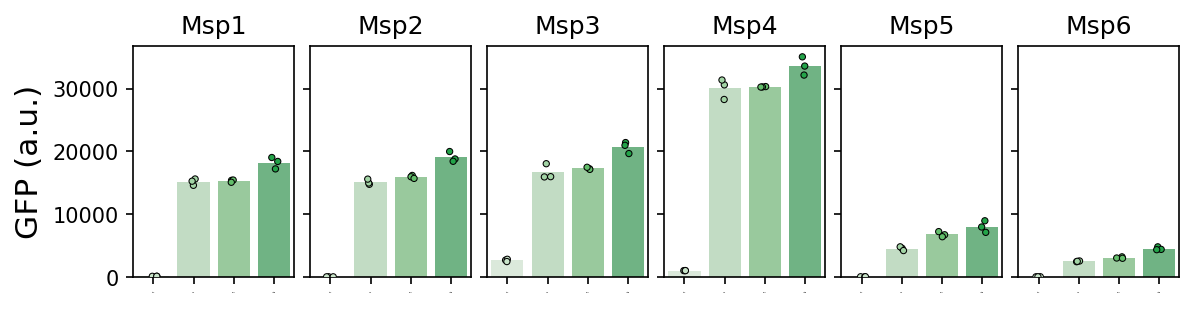

In [5]:
# plot
fig, axes = plt.subplots(1,6, figsize=(9, 2), sharey= True, sharex = True, dpi = 150)
plt.subplots_adjust( wspace=0.1)

df = gfp_long 
strains = gfp_long.sample_name.unique()
pal = ['#C8E4C9', '#A2D4A5', '#63BE6B', '#23A349']

for st, ax in zip(strains, axes.flatten()):
    # Draw the bar chart
    b = sns.barplot( data=df[df['sample_name'] == st], x="media", y="GFP", 
        alpha=0.7, errorbar=None, palette = pal,ax = ax)

    # Draw the stripplot
    sns.stripplot(data=df[df['sample_name'] == st], x="media", y="GFP", 
        hue="media", edgecolor="black", linewidth=.5,s = 3,ax=ax,palette = pal)
    
    # Remove the old legend
    ax.legend_.remove()

    b.axes.set_title(st)
    b.set_ylabel(" ")
    b.set_xlabel(" ")
    b.tick_params(axis='both', which='major', labelsize=10)
    b.tick_params(axis='x', labelsize=0)

axes[0].set_ylabel("GFP (a.u.)", fontsize = 15)
plt.show()